In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio

In [91]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
paths=[]
labels=[]
for dirname,_, filenames in os.walk(r"C:\Users\Lenovo\Downloads\TESS"):
    for filename in filenames :
        paths.append(os.path.join( dirname ,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())

In [93]:
df= pd.DataFrame()
df['Emotions']=labels
df['Path']=paths
df.head()

Emotions                                               Path
0    angry  C:\Users\Lenovo\Downloads\TESS\TESS\OAF_angry\...
1    angry  C:\Users\Lenovo\Downloads\TESS\TESS\OAF_angry\...
2    angry  C:\Users\Lenovo\Downloads\TESS\TESS\OAF_angry\...
3    angry  C:\Users\Lenovo\Downloads\TESS\TESS\OAF_angry\...
4    angry  C:\Users\Lenovo\Downloads\TESS\TESS\OAF_angry\...

Text(0, 0.5, 'Utterence Count')

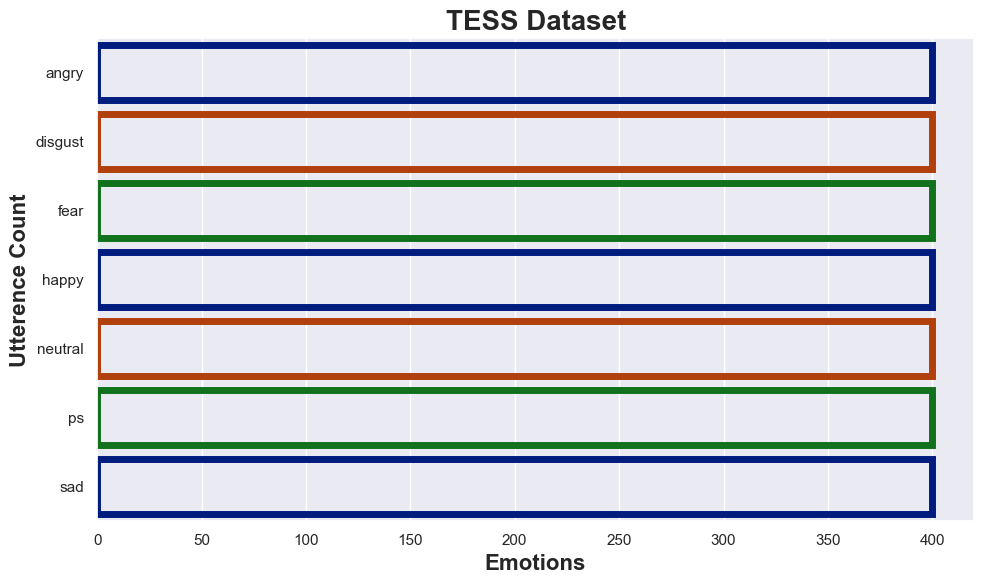

In [94]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax=sns.countplot(df.Emotions, facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("dark",3))

ax.axes.set_title("TESS Dataset",fontsize=20, weight='bold')
ax.set_xlabel("Emotions",fontsize=16, weight="bold")
ax.set_ylabel("Utterence Count",fontsize=16,weight="bold")



In [95]:
emotion_1='disgust'
emotion_2='sad'
path_1=np.array(df[df['Emotions']==emotion_1]['Path'])[0]
path_2=np.array(df[df['Emotions']==emotion_2]['Path'])[0]

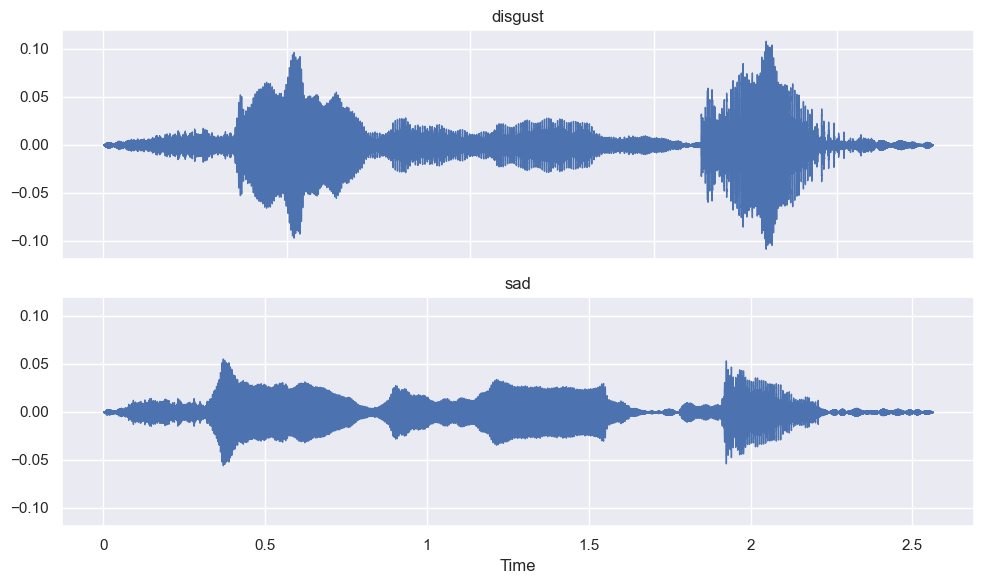

In [96]:
plt.rcParams["figure.figsize"]=[10,6]
plt.rcParams["figure.autolayout"]= True
fig,ax=plt.subplots(nrows=2,sharey=True)
data_1,sampling_rate_1=librosa.load(path_1)
librosa.display.waveshow(data_1, sr=sampling_rate_1,ax=ax[0])
ax[0].set(title='disgust')
ax[0].label_outer()

data2,sampling_rate_2=librosa.load(path_2)
librosa.display.waveshow(data2,sr=sampling_rate_2,ax=ax[1])
ax[1].set(title='sad')
ax[1].label_outer()

In [97]:
import librosa
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load audio files
data_1, sr1 = librosa.load(path_1)
data_2, sr2 = librosa.load(path_2)

# Create time axes
time_1 = librosa.times_like(data_1, sr=sr1)
time_2 = librosa.times_like(data_2, sr=sr2)

# Create subplots with shared y-axis
fig = make_subplots(rows=2, cols=1, shared_yaxes=True, subplot_titles=("Disgust", "Sad"))

# Add first waveform
fig.add_trace(go.Scatter(x=time_1, y=data_1, mode='lines', name='Disgust'), row=1, col=1)

# Add second waveform
fig.add_trace(go.Scatter(x=time_2, y=data_2, mode='lines', name='Sad'), row=2, col=1)

# Layout adjustments
fig.update_layout(
    height=600,
    width=900,
    title_text="Waveforms of Two Audio Files",
    showlegend=False
)

fig.show()


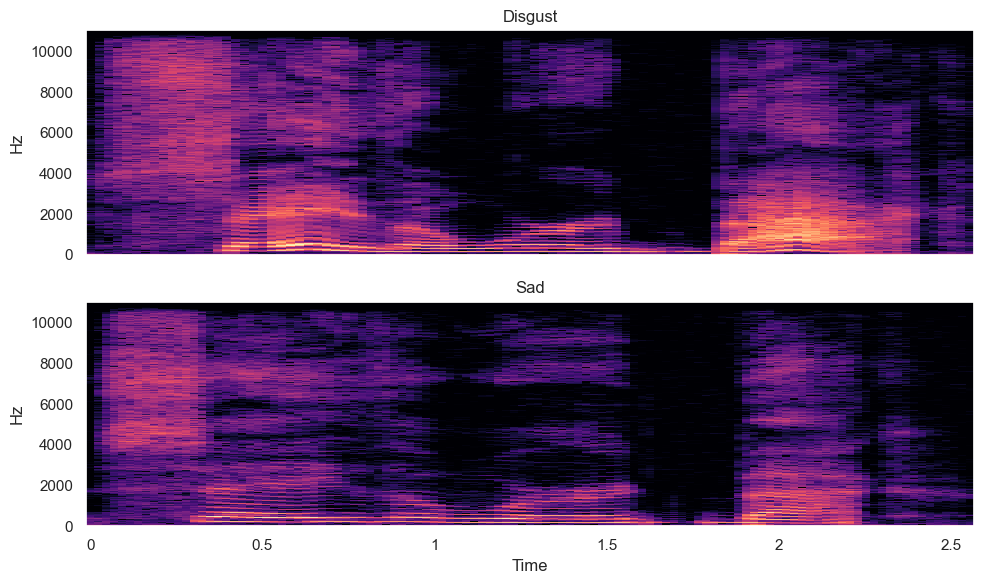

In [98]:
fig,ax=plt.subplots(nrows=2,sharex=False)
x_1=librosa.stft(data_1)
x_1_dB=librosa.amplitude_to_db(abs(x_1))
x_plt_1=librosa.display.specshow (x_1_dB,sr=sampling_rate_1, x_axis='time',y_axis='linear',ax=ax[0])
ax[0].set(title='Disgust')
ax[0].label_outer()

# fig,ax=plt.subplots(nrows=2,sharex=False)
x_2=librosa.stft(data_2)
x_2_dB=librosa.amplitude_to_db(abs(x_2))
x_plt_1=librosa.display.specshow (x_2_dB,sr=sampling_rate_1, x_axis='time',y_axis='linear',ax=ax[1])
ax[1].set(title='Sad')
ax[1].label_outer()

In [99]:
from plotly.subplots import make_subplots

import plotly.graph_objs as go

# Prepare time and frequency axes for both spectrograms
freqs_1 = librosa.fft_frequencies(sr=sampling_rate_1)
times_1 = librosa.frames_to_time(np.arange(x_1_dB.shape[1]), sr=sampling_rate_1)
freqs_2 = librosa.fft_frequencies(sr=sampling_rate_2)
times_2 = librosa.frames_to_time(np.arange(x_2_dB.shape[1]), sr=sampling_rate_2)

# Create subplots for both spectrograms
fig = make_subplots(rows=2, cols=1, shared_xaxes=False, subplot_titles=("Disgust", "Sad"))

# Disgust spectrogram
fig.add_trace(
    go.Heatmap(
        z=x_1_dB,
        x=times_1,
        y=freqs_1,
        colorscale='Viridis',
        colorbar=dict(title='dB'),
        zmin=np.min(x_1_dB),
        zmax=np.max(x_1_dB)
    ),
    row=1, col=1
)

# Sad spectrogram
fig.add_trace(
    go.Heatmap(
        z=x_2_dB,
        x=times_2,
        y=freqs_2,
        colorscale='Viridis',
        colorbar=dict(title='dB'),
        zmin=np.min(x_2_dB),
        zmax=np.max(x_2_dB)
    ),
    row=2, col=1
)

fig.update_yaxes(title_text="Frequency (Hz)", row=1, col=1)
fig.update_yaxes(title_text="Frequency (Hz)", row=2, col=1)
fig.update_xaxes(title_text="Time (s)", row=2, col=1)
fig.update_layout(height=800, width=900, title_text="Spectrograms of Two Audio Files")
fig.show()

In [100]:
def trimm(data):
    data_trimmed, _= librosa.effects.trim(data, top_db=20)
    return data_trimmed

def pad(data,samplingRate,pitch_factor):
    return librosa.effects.pitch_shift(data, samplingRate, pitch_factor)

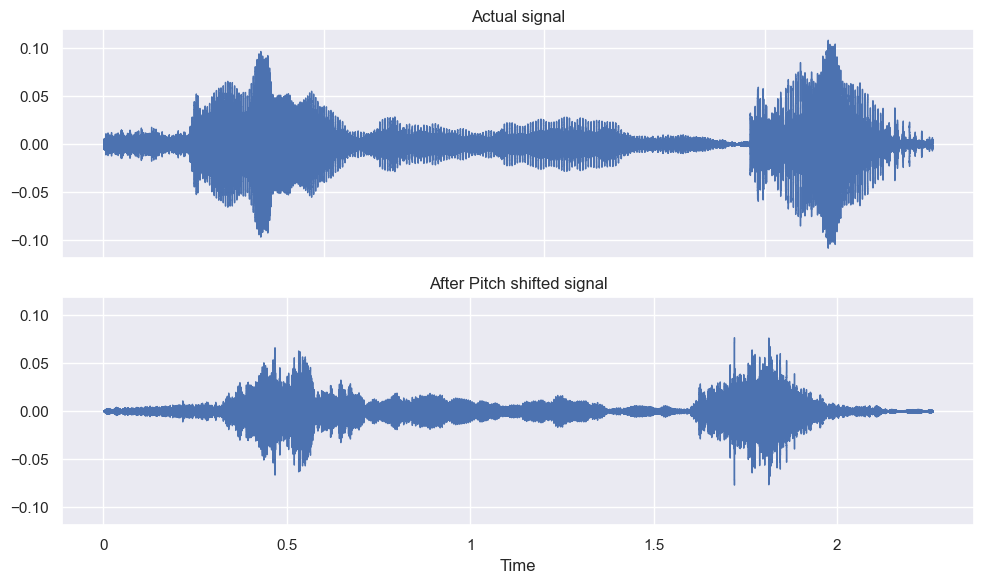

In [101]:
fig,ax=plt.subplots(nrows=2,sharey=True)
librosa.display.waveshow(trimm(data_1), sr=sampling_rate_1,ax=ax[0])
ax[0].set(title='Actual signal')
ax[0].label_outer()
x=librosa.effects.pitch_shift(data_1, sr=sampling_rate_1, n_steps=3)
librosa.display.waveshow(x, sr=sampling_rate_1,ax=ax[1])
ax[1].set(title='After Pitch shifted signal')
ax[1].label_outer()

plt.tight_layout()
plt.show()

In [102]:
from plotly.subplots import make_subplots

import plotly.graph_objs as go

# Create time axis for pitch shifted signal
time_pitch_shifted = librosa.times_like(x, sr=sampling_rate_1)

# Create subplots for original and pitch shifted signals
fig_plotly = make_subplots(rows=2, cols=1, shared_yaxes=True, subplot_titles=("Actual signal", "After Pitch shifted signal"))

# Plot actual signal
fig_plotly.add_trace(
    go.Scatter(x=time_1, y=trimm(data_1), mode='lines', name='Actual signal'),
    row=1, col=1
)

# Plot pitch shifted signal
fig_plotly.add_trace(
    go.Scatter(x=time_pitch_shifted, y=x, mode='lines', name='After Pitch shifted signal'),
    row=2, col=1
)

fig_plotly.update_layout(
    height=600,
    width=900,
    title_text="Waveforms: Actual vs Pitch Shifted Signal",
    showlegend=False
)

fig_plotly.show()

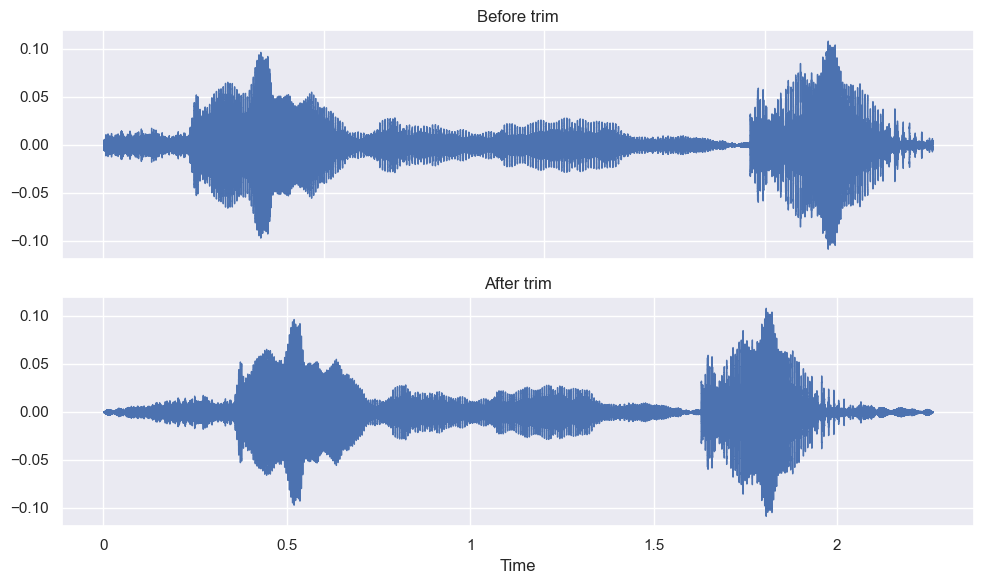

In [103]:
fig,ax=plt.subplots(nrows=2,sharey=True)
librosa.display.waveshow(trimm(data_1), sr=sampling_rate_1,ax=ax[0])
ax[0].set(title='Before trim')
ax[0].label_outer()

x,_= librosa.effects.trim(data_1)
librosa.display.waveshow(x, sr=sampling_rate_1,ax=ax[1])
ax[1].set(title='After trim')
ax[1].label_outer()
plt.tight_layout()
plt.show()

In [104]:
from plotly.subplots import make_subplots

# Trim the signal using the existing trimm function
trimmed_data_1 = trimm(data_1)

# Create time axis for trimmed signal
time_trimmed = librosa.times_like(trimmed_data_1, sr=sampling_rate_1)

# Plot original and trimmed signals using Plotly
import plotly.graph_objs as go

fig_trim = make_subplots(rows=2, cols=1, shared_yaxes=True, subplot_titles=("Before trim", "After trim"))

# Before trim
fig_trim.add_trace(
    go.Scatter(x=time_1, y=data_1, mode='lines', name='Before trim'),
    row=1, col=1
)

# After trim
fig_trim.add_trace(
    go.Scatter(x=time_trimmed, y=trimmed_data_1, mode='lines', name='After trim'),
    row=2, col=1
)

fig_trim.update_layout(
    height=600,
    width=900,
    title_text="Waveforms: Before vs After Trim",
    showlegend=False
)

fig_trim.show()

In [105]:
import soundfile as soundfile

In [106]:
def extract_features(filename):
    with soundfile.SoundFile(filename) as soundFile:
        x=soundFile.read(dtype='float32')
        sampleRate=soundFile.samplerate
        res=np.array([])

        x=trimm(x)
        x= pitch (x,sampleRate,3)

        stft=np.abs(librosa.stft(x))


        # mfcc
        mfccs=np.mean(librosa.feature.mfcc(y=x,sr=sampleRate,n_mfcc=13).T,axis=0)
        res=np.hstack((res,mfccs))

        # delta
        delta_mfccs=librosa.feature.delta(mfccs)
        res=np.hstack((res,delta_mfccs))

        # duble delta
        double_delta_mfccs=librosa.feature.delta(mfccs,order=2)
        res=np.hstack((res,double_delta_mfccs))

        # chroma
        chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sampleRate).T,axis=0)
        res=np.hstack((res,chroma))

        # mel spectrogram
        mel_spectrogram=np.mean(librosa.feature.melspectrogram(x,sr=sampleRate).T,axis=0)
        res=np.hstack((res,mel_spectrogram))

In [107]:
observedEmotions = ['Disgust','Happy','Sad','Fear','Pleasent\nSurprise','Angry','Neutral']

In [108]:
# import numpy as np
# import pandas as pd
# import librosa
# import soundfile as sf
# from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings("ignore")

# # --- Define trimming ---
# def trimm(audio):
#     return librosa.effects.trim(audio, top_db=20)[0]

# # --- Define pitch shifting ---
# def pitch(audio, sample_rate, n_steps=3):
#     return librosa.effects.pitch_shift(audio, sample_rate, n_steps=n_steps)

# # --- Define feature extractor ---
# def extract_features(filename):
#     try:
#         audio, sample_rate = sf.read(filename, dtype='float32')

#         # Preprocessing
#         audio = trimm(audio)
#         audio = pitch(audio, sample_rate, n_steps=3)

#         # Feature extraction
#         stft = np.abs(librosa.stft(audio))
#         mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
#         chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
#         mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate).T, axis=0)
#         contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
#         tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T, axis=0)

#         return np.hstack([mfccs, chroma, mel, contrast, tonnetz])
#     except Exception as e:
#         print(f"Error processing {filename}: {e}")
#         return None

# # --- Load data and split ---
# def loadData(test_size=0.25):
#     x, y = [], []
#     for ind in df.index:
#         emotion = df.loc[ind, 'Emotions']
#         file = df.loc[ind, 'Path']
#         feature = extract_features(file)
#         if feature is not None and len(feature) > 0:
#             x.append(feature)
#             y.append(emotion)
#     if len(x) == 0:
#         raise ValueError("No valid features extracted. Check audio files or feature extraction.")
#     return train_test_split(np.array(x), np.array(y), test_size=test_size, random_state=20)

# # --- Sample usage ---
# # Make sure df is already defined with 'Path' and 'Emotions' columns
# # Example:
# # df = pd.read_csv('your_data.csv')

# # Now run
# xTrain, xTest, yTrain, yTest = loadData(test_size=0.25)

# # Print info
# print('Samples:', xTrain.shape[0])
# print('Features:', xTrain.shape[1])
# print('First sample feature vector:\n', xTrain[0])


In [109]:
# def loadData(test_size=0.25):
#     x,y=[],[]
#     for ind in df.index:
#         emotion=df['Emotions'][ind]
#         file=df['Path'][ind]
#         feature=extract_features(file)
#         x.append(feature)
#         y.append(emotion)
#     return train_test_split(np.array(x), np.array(y), test_size=test_size, random_state=20)

# xTrain, xTest, yTrain, yTest = loadData(test_size=0.25)

# # Now print information
# print('Samples:', xTrain.shape[0])
# print('Features:', xTrain.shape[1])
# print('First sample feature vector:\n', xTrain[0])


    

In [110]:
# import glob
# def loadData(test_size=0.25):
#     x, y = [], []
#     for file in glob.glob("data/Actor_*/*.wav"):
#         emotion = int(file.split("\\")[-1].split("-")[2])
#         if emotion not in [1, 2, 3, 4, 5, 6, 7, 8]:
#             continue
#         features = extract_features(file)
#         x.append(features)
#         y.append(emotion)
#     x = np.array(x)
#     y = np.array(y)
#     return train_test_split(x, y, test_size=test_size, random_state=9)


# xTrain, xTest, yTrain, yTest = loadData(test_size=0.25)

# print("X Train shape:", xTrain.shape)
# print("X Test shape:", xTest.shape)
# print("Y Train shape:", yTrain.shape)
# print("Y Test shape:", yTest.shape)
# print("First training sample:", xTrain[0])
